In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\Deepanjali\Desktop\MLP_PROJECT\clean_dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Deepanjali\\Desktop\\MLP_PROJECT\\clean_dataset.csv'

In [ ]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

Preprocessing

In [ ]:
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('flight',axis=1)

df['class'] = df['class'].apply(lambda x : 1 if x == 'Business' else 0)

In [ ]:
df['class'].value_counts()

class
0    206666
1     93487
Name: count, dtype: int64

In [ ]:
df.stops = pd.factorize(df.stops)[0]

In [ ]:
df = df.join(pd.get_dummies(df.airline,prefix = 'airline')).drop('airline',axis=1)
df = df.join(pd.get_dummies(df.source_city,prefix = 'source')).drop('source_city',axis=1)
df = df.join(pd.get_dummies(df.destination_city,prefix = 'dest')).drop('destination_city',axis=1)
df = df.join(pd.get_dummies(df.arrival_time,prefix = 'arrival')).drop('arrival_time',axis=1)
df = df.join(pd.get_dummies(df.departure_time,prefix = 'departure')).drop('departure_time',axis=1)

Training Regression model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X,y = df.drop('price', axis=1), df.price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
reg = RandomForestRegressor(n_jobs =-1)

reg.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [ ]:
reg.score(X_test, y_test)

0.9861352705978701

In [ ]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

print('R2:' , r2_score(y_test, y_pred))
print('MSE:' , mean_squared_error(y_test, y_pred))
print('MAE:' , mean_absolute_error(y_test, y_pred))
print('RMSE:' , math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9861352705978701
MSE: 7122532.902536011
MAE: 1056.850310396044
RMSE: 2668.8073933006126


In [ ]:
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100,300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2,11),
    'min_samples_leaf': randint(1,5),
    'max_features': [1.0, 'sqrt', 'log2']
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3,
                                    scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [ ]:
best_regressor.score(X_test, y_test)

0.9869336533633478

In [ ]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_regressor.predict(X_test)

print('R2:' , r2_score(y_test, y_pred))
print('MSE:' , mean_squared_error(y_test, y_pred))
print('MAE:' , mean_absolute_error(y_test, y_pred))
print('RMSE:' , math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9869336533633478
MSE: 6712390.926374605
MAE: 1076.5869183913103
RMSE: 2590.828231738763


Matplotlib is building the font cache; this may take a moment.


Text(0, 0.5, 'Predicted Flight price')

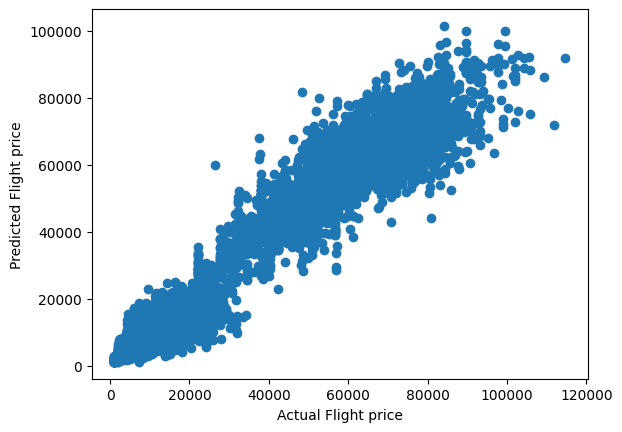

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight price')
plt.ylabel('Predicted Flight price')

In [ ]:
import mlflow
import mlflow.sklearn

# Start tracking your experiment
with mlflow.start_run():
    # Log the parameters of your model (e.g., random forest parameters)
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 10)

    # Train your model (just like you've done before)
    model = RandomForestRegressor(n_estimators=100, max_depth=10)
    model.fit(X_train, y_train)

    # Log the trained model into MLflow
    mlflow.sklearn.log_model(model, "random_forest_model")

    # Log how well the model performed (e.g., accuracy)
    accuracy = model.score(X_test, y_test)
    mlflow.log_metric("accuracy", accuracy)

    print("Model accuracy:", accuracy)


NameError: name 'RandomForestRegressor' is not defined